In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
target_names = data.target_names

print(f"Dataset Breast Cancer")
print(f"Shape: {X.shape}")
print(f"Classes: {list(target_names)}")
print(f"Distribution: {np.bincount(y)} ({np.bincount(y) / len(y) * 100}%)")
print(f"Proportions originales: {np.bincount(y) / len(y)}")

Dataset Breast Cancer
Shape: (569, 30)
Classes: [np.str_('malignant'), np.str_('benign')]
Distribution: [212 357] ([37.25834798 62.74165202]%)
Proportions originales: [0.37258348 0.62741652]


## Sans stratification

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Train: {X_train.shape[0]} echantillons")
print(f"  Proportions: {np.bincount(y_train) / len(y_train)}")
print(f"Test:  {X_test.shape[0]} echantillons")
print(f"  Proportions: {np.bincount(y_test) / len(y_test)}")

Train: 398 echantillons
  Proportions: [0.37437186 0.62562814]
Test:  171 echantillons
  Proportions: [0.36842105 0.63157895]


## Avec stratification

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train: {X_train_s.shape[0]} echantillons")
print(f"  Proportions: {np.bincount(y_train_s) / len(y_train_s)}")
print(f"Test:  {X_test_s.shape[0]} echantillons")
print(f"  Proportions: {np.bincount(y_test_s) / len(y_test_s)}")

Train: 398 echantillons
  Proportions: [0.3718593 0.6281407]
Test:  171 echantillons
  Proportions: [0.37426901 0.62573099]


In [10]:
original_props = np.bincount(y) / len(y)

# sans stratification
train_props = np.bincount(y_train) / len(y_train)
test_props = np.bincount(y_test) / len(y_test)
ecart_sans = np.abs(original_props - test_props).sum()

# avec stratification
train_props_s = np.bincount(y_train_s) / len(y_train_s)
test_props_s = np.bincount(y_test_s) / len(y_test_s)
ecart_avec = np.abs(original_props - test_props_s).sum()

print(f"Ecart total par rapport aux proportions originales")
print(f"Sans stratification (test): {ecart_sans}")
print(f"Avec stratification (test): {ecart_avec}")

Ecart total par rapport aux proportions originales
Sans stratification (test): 0.008324854315049424
Avec stratification (test): 0.003371052117699058


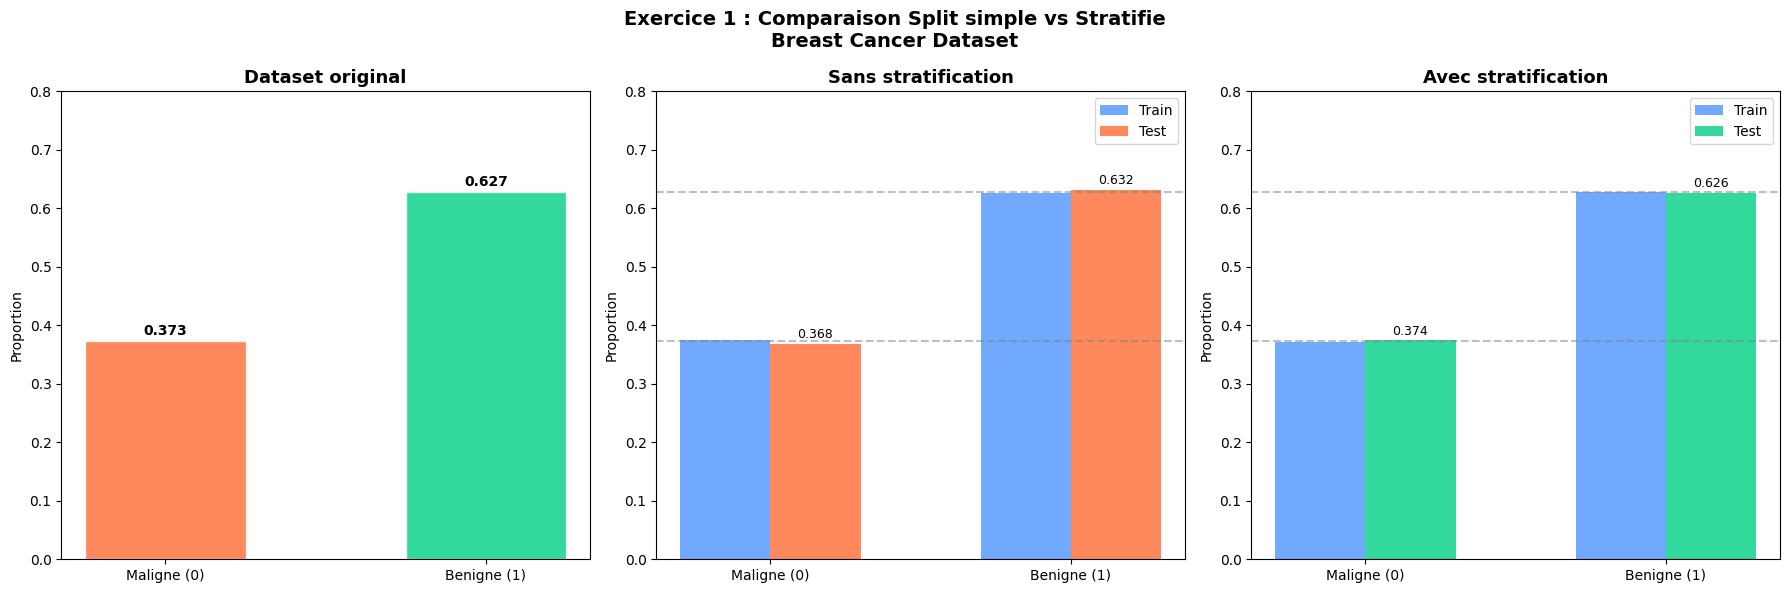

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

labels = ['Maligne (0)', 'Benigne (1)']
x = np.arange(len(labels))
width = 0.3

bars = axes[0].bar(x, original_props, width=0.5,
                   color=['#ff6b35', '#00d084'], alpha=0.8, edgecolor='white')
axes[0].set_title('Dataset original', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].set_ylabel('Proportion')
axes[0].set_ylim(0, 0.8)
for bar, prop in zip(bars, original_props):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{prop:.3f}', ha='center', fontweight='bold')


bars_train = axes[1].bar(x - width/2, train_props, width, label='Train',
                          color='#4d94ff', alpha=0.8)
bars_test = axes[1].bar(x + width/2, test_props, width, label='Test',
                         color='#ff6b35', alpha=0.8)
axes[1].axhline(y=original_props[0], color='gray', linestyle='--', alpha=0.5)
axes[1].axhline(y=original_props[1], color='gray', linestyle='--', alpha=0.5)
axes[1].set_title('Sans stratification', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)
axes[1].set_ylabel('Proportion')
axes[1].set_ylim(0, 0.8)
axes[1].legend()
for bar, prop in zip(bars_test, test_props):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{prop:.3f}', ha='center', fontsize=9)

bars_train_s = axes[2].bar(x - width/2, train_props_s, width, label='Train',
                            color='#4d94ff', alpha=0.8)
bars_test_s = axes[2].bar(x + width/2, test_props_s, width, label='Test',
                           color='#00d084', alpha=0.8)
axes[2].axhline(y=original_props[0], color='gray', linestyle='--', alpha=0.5)
axes[2].axhline(y=original_props[1], color='gray', linestyle='--', alpha=0.5)
axes[2].set_title('Avec stratification', fontsize=13, fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(labels)
axes[2].set_ylabel('Proportion')
axes[2].set_ylim(0, 0.8)
axes[2].legend()
for bar, prop in zip(bars_test_s, test_props_s):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{prop:.3f}', ha='center', fontsize=9)

plt.suptitle('Exercice 1 : Comparaison Split simple vs Stratifie\nBreast Cancer Dataset',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()